In [1]:
import pandas as pd
import numpy as np
import os,sys
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('C:/Users/Srijan-DS/Documents/Projects/identify-important-customers/data/raw/train_df.csv')

df.drop(['id'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,test_size=0.2,random_state=42)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import VarianceThreshold

transformer_1 = ColumnTransformer(
    transformers = [('tnf1', SimpleImputer(strategy='mean'), [0]),
                    ('tnf2', SimpleImputer(strategy='median'), [6]),
                    ('tnf3', SimpleImputer(strategy='most_frequent'), [7,10,12,15,16,22])
                    ],
     remainder = 'passthrough'
).set_output(transform='pandas')

transformer_2 = ColumnTransformer(
    transformers = [('trf4', OneHotEncoder(sparse=False,drop='first'),[2])],
    remainder = 'passthrough'
).set_output(transform='pandas')

transformer_3 = ColumnTransformer(
    transformers = [('trf5', RobustScaler(),[1,8,9,11,18,19,23,24,25]),
                   ('trf6', MinMaxScaler(),[0,2,3,4,5,6,7,10,12,13,14,15,16,17,20,21,22])
                   ],
    remainder = 'passthrough'
).set_output(transform='pandas')

transformer_4 = ColumnTransformer(
    transformers = [('trf6', VarianceThreshold(threshold=0.05),[i for i in range(df.shape[1])])],
    remainder = 'passthrough'
).set_output(transform='pandas')

pipe = Pipeline(
    [
        ('transformer_1', transformer_1),
        ('transformer_2', transformer_2),
        ('transformer_3', transformer_3),
        ('transformer_4', transformer_4)
    ]
)

df_train = pipe.fit_transform(df_train)

extracted_names = [col.split('__')[-1] for col in df_train.columns]

df_train.columns = extracted_names
df_train.head()

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['important_customer'],axis=1),df_train['important_customer'], test_size = 0.2,
                 random_state=42)

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17500 entries, 0 to 17499
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_amount         15698 non-null  float64
 1   asset_amount            17500 non-null  int64  
 2   average_ratio           17500 non-null  float64
 3   personal_id_1           17500 non-null  int64  
 4   personal_id_2           17500 non-null  int64  
 5   age                     17500 non-null  int64  
 6   area                    15741 non-null  float64
 7   job_type                15771 non-null  object 
 8   phone                   17500 non-null  int64  
 9   personal_card_1         17500 non-null  int64  
 10  personal_card_2         15781 non-null  float64
 11  personal_card_3         17500 non-null  int64  
 12  personal_card_4         15774 non-null  float64
 13  car                     17500 non-null  int64  
 14  purchase_score          17500 non-null

In [5]:
df.head()

,purchase_amount,asset_amount,average_ratio,personal_id_1,personal_id_2,age,area,job_type,phone,personal_card_1,personal_card_2,personal_card_3,personal_card_4,car,purchase_score,campaign_use,card_expired,average_favorite_score,card_history_period,score_1,score_2,score_3,score_4,total_amount_1,total_amount_2,total_amount_3,important_customer
0,62978.0,64016,87.170255,1256,86,44,NaN,Salaried,1,1,NaN,0,1.0,0,0,0.0,0.0,0.010922,0.048340,0,7,0,0.0,58620,10590,1392,0
1,66790.0,64497,83.609102,666,86,30,5318.0,Salaried,1,0,0.0,1,0.0,0,705,0.0,0.0,1.687598,1.701259,0,0,6,0.0,70809,9575,889,0
2,57788.0,111404,58.986180,1621,120,36,5954.0,Self employed,1,1,0.0,0,NaN,0,309,2.0,1.0,0.001265,3.483625,0,9,6,0.0,55294,38319,779,0
3,59729.0,63983,72.702121,1731,51,27,7263.0,NaN,1,0,0.0,0,0.0,0,740,0.0,0.0,0.015441,3.338835,0,1,2,0.0,1972,9314,2081,0
4,50533.0,98623,82.218856,801,86,40,6270.0,NaN,1,1,0.0,0,0.0,0,3,0.0,0.0,0.001283,0.067355,0,2,0,0.0,4942,10484,1772,0


In [3]:
X_train.head()

,purchase_amount,asset_amount,average_ratio,personal_id_2,average_favorite_score,card_history_period,total_amount_1,total_amount_2,total_amount_3,job_type_Self employed,area,personal_card_2,personal_id_1,age,personal_card_1,personal_card_3,car,purchase_score
9325,0.003876,2.976804,0.558370,0.421053,0.000761,-0.282117,-0.038656,-0.322056,-0.253959,1.0,0.454744,0.0,0.432190,0.793103,1.0,0.0,0.0,0.809917
559,1.196646,-0.058252,0.040632,-0.078947,0.993070,0.333653,-0.086266,0.405444,0.194169,0.0,0.792218,0.0,0.235092,0.793103,0.0,0.0,0.0,0.002361
4242,-0.932501,-0.551225,-0.225392,1.815789,-0.008101,-0.280457,0.957379,-0.214592,0.084061,0.0,0.924096,0.0,0.548813,0.137931,1.0,0.0,0.0,0.824085
14367,1.185535,-0.175069,-1.554507,0.000000,-0.013753,-0.278891,-0.062310,17.868837,0.091165,1.0,0.010648,0.0,0.388127,0.620690,1.0,1.0,0.0,0.004723
11995,-0.266139,0.331174,-1.579738,-0.157895,-0.012254,-0.207876,-0.080263,-0.032481,-0.490750,1.0,0.461024,0.0,0.185488,0.241379,1.0,0.0,0.0,0.671783


In [4]:
y_train.head()

9325     0
559      0
4242     0
14367    0
11995    0
Name: important_customer, dtype: int64

In [5]:
pipe

Pipeline(steps=[('transformer_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', SimpleImputer(), [0]),
                                                 ('tnf2',
                                                  SimpleImputer(strategy='median'),
                                                  [6]),
                                                 ('tnf3',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [7, 10, 12, 15, 16, 22])])),
                ('transformer_2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf4',
                                                  OneHotEncoder(drop='first',
                                                                sparse=...
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf5', RobustScaler(),
                                                  [1, 8, 9, 11, 18, 19, 23, 24,
                                                   25]),
                                                 ('trf6', MinMaxScaler(),
                                                  [0, 2, 3, 4, 5, 6, 7, 10, 12,
                                                   13, 14, 15, 16, 17, 20, 21,
                                                   22])])),
                ('transformer_4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf6',
                                                  VarianceThreshold(threshold=0.05),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26])]))])

In [6]:
## base model

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.tree import DecisionTreeClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import classification_report,confusion_matrix
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

In [7]:
models = {
                "XGBRegressor":XGBClassifier(),
                "DecisionTreeRegressor":DecisionTreeClassifier(),
                "GradientBoostingRegressor":GradientBoostingClassifier(),
                "RandomForestRegressor":RandomForestClassifier()
            }

***********XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)***************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2303
           1       0.72      0.45      0.55       497

    accuracy                           0.87      280

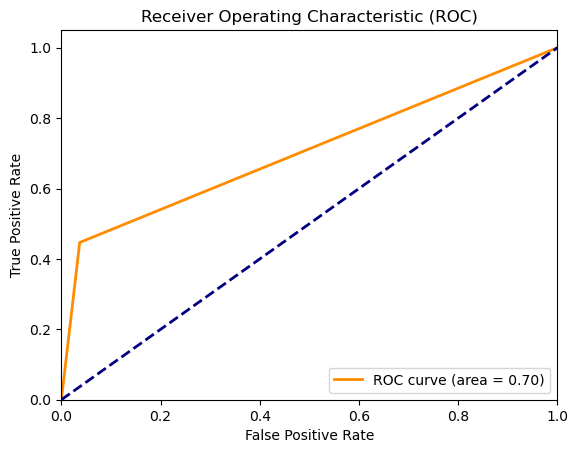

***********DecisionTreeClassifier()***************
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2303
           1       0.52      0.59      0.55       497

    accuracy                           0.83      2800
   macro avg       0.71      0.73      0.72      2800
weighted avg       0.84      0.83      0.83      2800

[[2030  273]
 [ 206  291]]


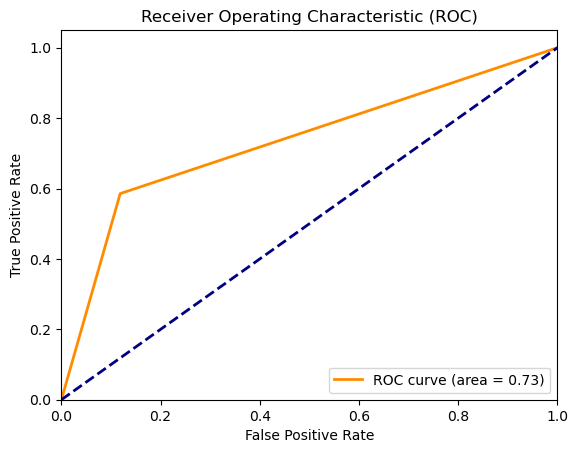

***********GradientBoostingClassifier()***************
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2303
           1       0.65      0.14      0.24       497

    accuracy                           0.83      2800
   macro avg       0.75      0.56      0.57      2800
weighted avg       0.81      0.83      0.79      2800

[[2265   38]
 [ 425   72]]


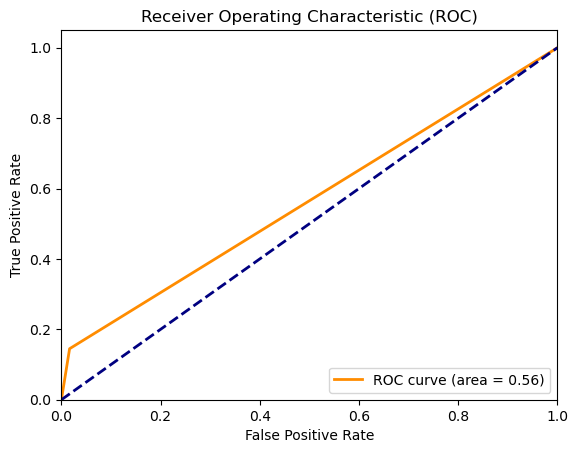

***********RandomForestClassifier()***************
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2303
           1       0.92      0.38      0.53       497

    accuracy                           0.88      2800
   macro avg       0.90      0.68      0.73      2800
weighted avg       0.89      0.88      0.86      2800

[[2286   17]
 [ 310  187]]


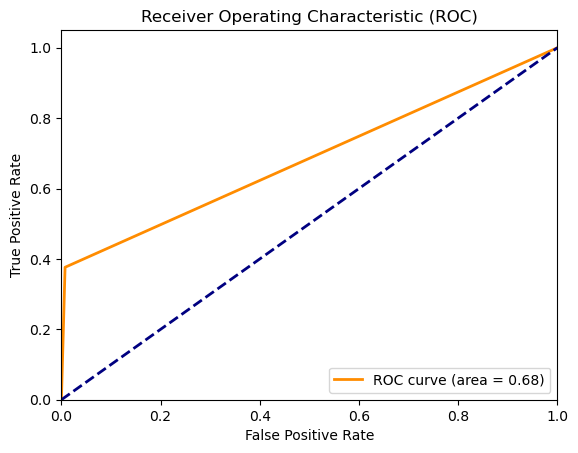

In [11]:
for i in models.values():
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    print(f"***********{i}***************")
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    # Calculate ROC curve
    fpr, tpr,threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()